## Teoría de Filtrado Moderna: Funciones de aproximación

En el siguiente documento se presenta una comparativa de las funciones de aproximación estudiadas en Teoría de Filtrado Moderna, en la asignatura Teoría de Circuitos 2:

* Butterworth
* Chebyshev
* Bessel
* Cauer

El script siguiente permite parametrizar el orden de los polinomios de cada función. Como resultado se obtiene:

* Respuesta de módulo, fase y retardo de grupo
* Diagrama de polos y ceros



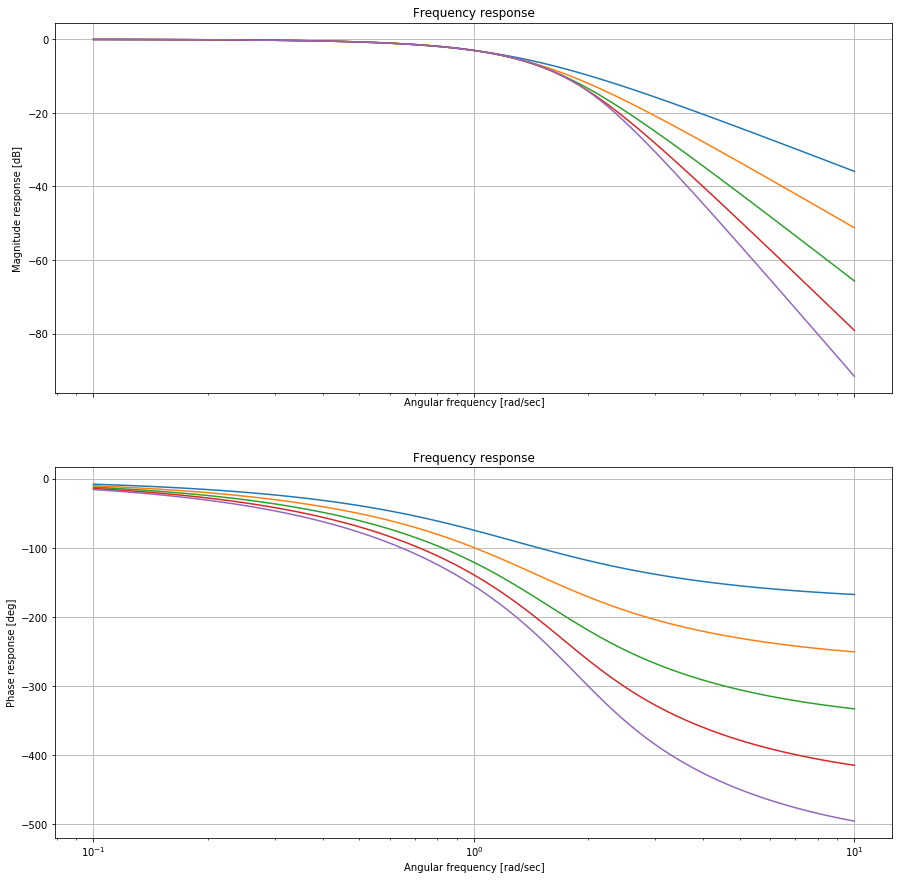

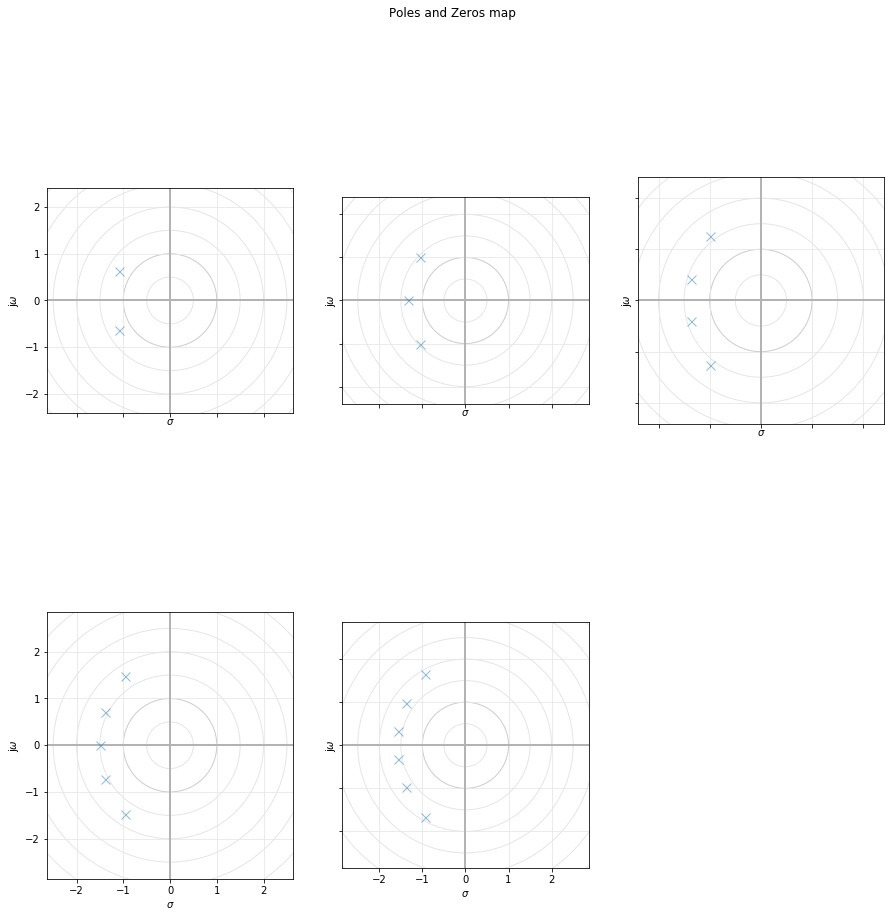

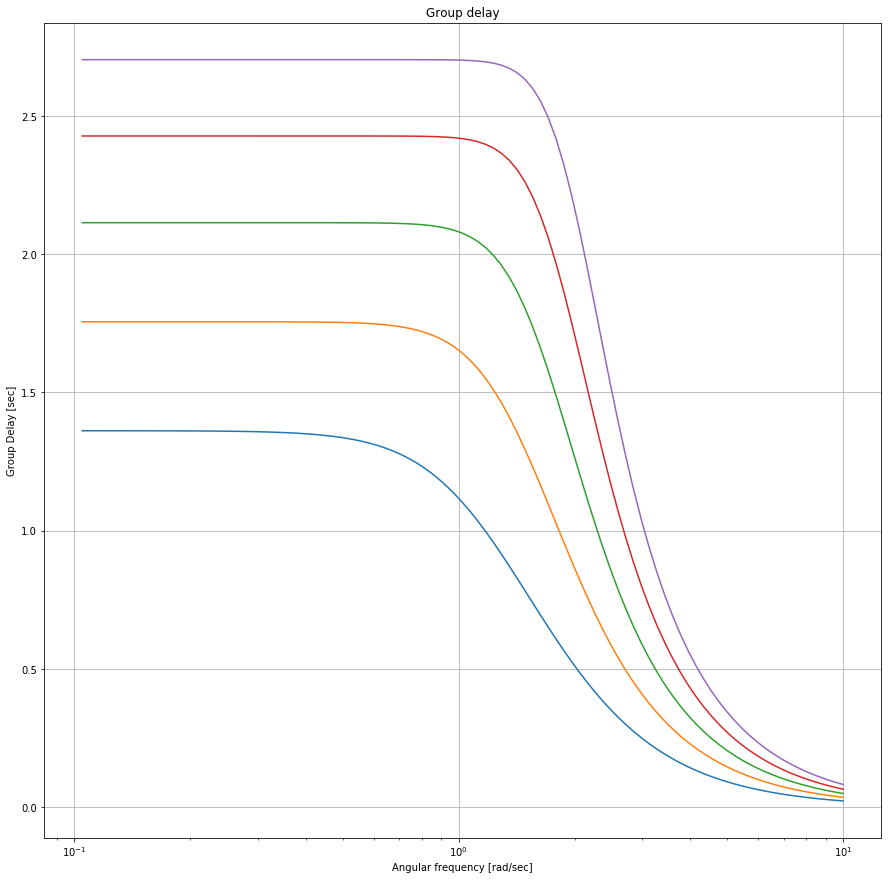

In [4]:
%matplotlib inline  

import scipy.signal as sig
import matplotlib as mpl
from splane import pzmap, grpDelay, bodePlot

def analyze_sys( all_sys, all_legends ):
    
    cant_sys = len(all_legends);

    ## BODE plots
    fig_hdl = 1
    axes_hdl = ()

    for ii in range(cant_sys):
        fig_hdl, axes_hdl = bodePlot(all_sys[ii], fig_hdl, axes_hdl)

    ## PZ Maps
    fig_hdl = 2
    
    pzmap(all_sys, fig_hdl)

    ## Group delay plots
    fig_hdl = 3
    
    for ii in range(cant_sys):
        fig_hdl = grpDelay(all_sys[ii], fig_hdl)
    

mpl.rcParams['figure.figsize'] = (15,15)
    
#####################
## Start of script ##
#####################
        
        
#aprox_name = 'Butterworth'
#aprox_name = 'Chebyshev1'
#aprox_name = 'Chebyshev2'
aprox_name = 'Bessel'
#aprox_name = 'Cauer'

ripple = 0.5
attenuation = 40
orders2analyze = range(2,7)

all_sys = []

for ii in orders2analyze:

    if aprox_name == 'Butterworth':
    
        z,p,k = sig.buttap(ii)
    
    elif aprox_name == 'Chebyshev1':
    
        z,p,k = sig.cheb1ap(ii, ripple)
        
    elif aprox_name == 'Chebyshev2':
    
        z,p,k = sig.cheb2ap(ii, ripple)
        
    elif aprox_name == 'Bessel':
        
        z,p,k = sig.besselap(ii, norm='mag')
        
    elif aprox_name == 'Cauer':
       
        z,p,k = sig.ellipap(ii, ripple, attenuation)


    num, den = sig.zpk2tf(z,p,k)
    
    all_sys.append(sig.TransferFunction(num,den))


analyze_sys( all_sys, orders2analyze )

